# Day 2

In [27]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [86]:
import quandl
quandl.ApiConfig.api_key = 'NqQjctmu1yo-ma6a_T3b'
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [87]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df.shape

(3424, 5)

In [88]:
#defining a percentage volitility column
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] *100.0

In [89]:
#defining a percentage change column
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] *100.0

In [90]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [91]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


# Day 3

In [92]:
# Defining the label column
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [93]:
import math

forecast_out = int(math.ceil(0.1*len(df)))

In [94]:
df['label'] = df[forecast_col].shift(-forecast_out)
df1 = df.copy()
df.dropna(inplace=True)

df.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


# Day 4

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.svm import SVR

x = np.array(df.drop(['label'], axis=1))
y = np.array(df['label'])

X = preprocessing.scale(x)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_accuracy = reg.score(X_test, y_test)
reg_accuracy

0.8885732760368833

In [97]:
svr = SVR()
svr.fit(X_train, y_train)
svr_accuracy = svr.score(X_test, y_test)
svr_accuracy

0.7313538252325764

In [98]:
df.isnull().sum()

Adj. Close     0
HL_PCT         0
PCT_change     0
Adj. Volume    0
label          0
dtype: int64

# Day 5

In [99]:

new_X = np.array(df1.drop(['label'], axis=1))
new_X = preprocessing.scale(new_X)
new_X_lately = new_X[-forecast_out:]
new_X = new_X[:-forecast_out]


df1.dropna(inplace=True)
y1 = np.array(df1['label'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(new_X, y1, test_size=0.2, random_state=0)

In [100]:
new_reg = LinearRegression()
new_reg.fit(X_train, y_train)
new_reg_accuracy = new_reg.score(X_test, y_test)
new_reg_accuracy

0.8885732760368833

In [101]:
forecast_set = new_reg.predict(new_X_lately)
print(forecast_set, new_reg_accuracy, forecast_out)

[ 766.54657087  760.03178875  782.1625419   775.16036089  784.4118709
  782.87461368  784.0956868   786.75060332  778.84521547  774.73072142
  804.27436106  791.9531292   781.16934941  767.22324418  769.17491635
  779.48657176  779.03170916  791.88197248  792.97436838  806.93639669
  804.53688884  819.16450494  816.96611471  813.51984518  805.1752324
  809.56922908  807.0986841   803.31512941  801.36636024  802.14986274
  809.57905841  800.60585189  797.57112297  790.84093724  807.84596294
  803.72043199  807.19946623  826.01887746  819.98991997  817.87236199
  819.56038586  818.7939808   823.50853827  816.73406171  817.01528585
  821.66873989  816.28526709  840.91764648  839.40388643  846.90464687
  843.80372215  850.38414529  819.34545495  812.41275305  809.22026259
  818.34625366  814.67007039  811.12873552  823.07930245  823.07232172
  818.80876256  826.34524435  830.38644577  829.29144162  829.19981316
  832.09853878  836.66665403  839.98838945  842.79603476  838.4311737
  834.171

In [102]:
df1['Forecast'] = np.nan

In [103]:
last_date = df1.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [104]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df1.loc[next_date] = [np.nan for _ in range(len(df1.columns)-1)] + [i]

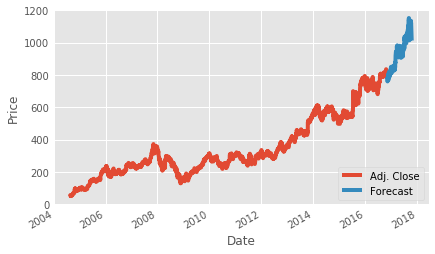

In [106]:
style.use('ggplot')


df1['Adj. Close'].plot()
df1['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('stock-price-fig.png')

# Day 6
Pickling and Scaling

Pickle is used here to save and load our trained regressor to save us the time of training it everytime we want to use it.

In [32]:
import pickle

# with open('linearregression.pickle', 'wb') as f:
#     pickle.dump(reg, f)
    
pickle_in = open('linearregression.pickle', 'rb')
pickle_reg = pickle.load(pickle_in)
pickle_reg_accuracy = pickle_reg.score(X_test, y_test)
pickle_reg_accuracy

0.9793864220258133

# Day 8
## Coding a linear regression algorithm from scratch\


In [28]:
from statistics import mean

In [29]:
# Creating some random data

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

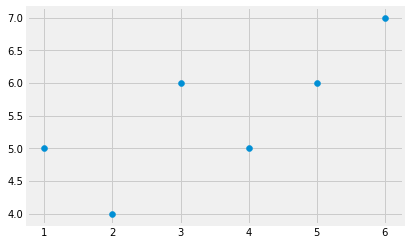

In [30]:
plt.scatter(xs,ys)

In [31]:
# To define a functon for best-fit slope
def best_fit_slope(xs,ys):
    '''
    **args:
    ___features(xs), targets(ys)
    
    **formulae:
    ___m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
         (mean(xs)**2 - mean(xs**2)) )
    
    **returns:
    ___slope as m
    '''
    
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
         (mean(xs)**2 - mean(xs**2)) )
    return m

m = best_fit_slope(xs,ys)
m

0.42857142857142866

# Day 9


In [33]:
# To define a function for best-intercept
def best_intercept(slope):
    '''
    **args:
    ___Slope
    
    **formulae:
    ___b = mean(y) - m*mean(x)
    
    **returns:
    ___intercept
    '''
    
    intercept = mean(ys) - (slope*mean(xs)) 
    return intercept

b = best_intercept(best_fit_slope(xs,ys))
b

4.0

In [34]:
# Creating of list of the possible regression lines 
# from the data

regression_line = [((m*x)+b) for x in xs]

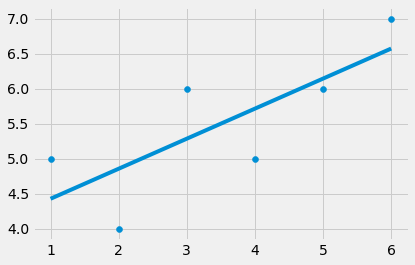

In [35]:
# Visualizing the lines on the data

style.use("fivethirtyeight")

plt.scatter(xs,ys)
plt.plot(xs, regression_line)

0.5844155844155845


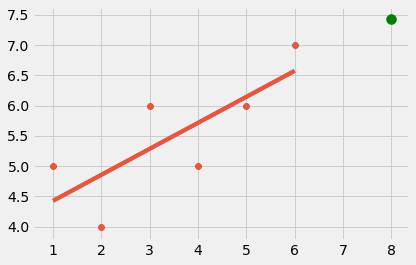

In [71]:
# To make a prediction and visualize

def visualize(xs, ys, to_predict=None):
    '''
    **args:
    ___X-Values, Y-Values, Point to predict 
    
    **formulae:
    ___None
    
    **returns:
    ___a visyal plot of the regression model and possible predictions
    '''
    
    slope = best_fit_slope(xs,ys)
    intercept = best_intercept(slope)
    regression_line = [((slope*x)+intercept) for x in xs]
    r_squared = coefficient_of_determination(ys, regression_line)
    print(r_squared)
    
    if to_predict:
        predict_x = to_predict
        predict_y = (m*predict_x)+b
        plt.scatter(predict_x, predict_y, s=100, color="g")        
        plt.scatter(xs,ys)
        plt.plot(xs, regression_line)
    else:
        pass

    plt.scatter(xs,ys)
    plt.plot(xs, regression_line)
    
    return plt.show()

visualize(xs,ys,8)

# Day 10 - 11

In [37]:
# Calculating the squarred error

def squared_error(ys_orig, ys_line):
    '''
    **args:
    ___Y-Actual Values, Y-Predictions
    
    **formulae:
    ___error = summation((ys_orig-ys_line)**2)
    
    **returns:
    ___error
    '''
    return sum((ys_orig-ys_line)**2)
    

In [38]:
# Calculating the coefficient of determination

def coefficient_of_determination(ys_orig, ys_line):
    '''
    **args:
    ___Y-Actual Values, Y-Predictions 
    
    **formulae:
    ___coeff(r^2) = 1 - (squared-error(y-hat)/(squared-error(y-mean))
    
    **returns:
    ___r^2
    '''
    
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

In [39]:
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.5844155844155845

# Day 12

### Testing Assumptions

In [54]:
import random

def create_dataset(how_many, variance, step=2, correlation=False):
    '''
    **args:
    ___how_many=(size of our data_points), variance=boundary for generated values
    ___step=(how far the values are to be incresed for every y), correlation=(determinant for the step)
    
    **formulae:
    ___None
    
    **returns:
    ___An array of generated x and y values 
    '''    
    
    val = 1
    ys = []
    for i in range(how_many):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    xs = [i for i in range(len(ys))]
    
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

0.20593222398091626


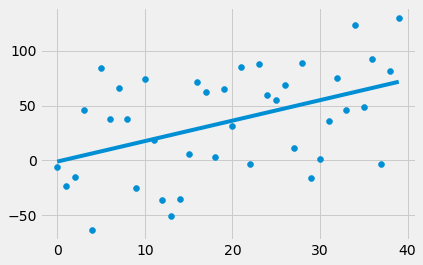

In [85]:
# Testing and visualizing our new dataset
new_xs, new_ys = create_dataset(40, 80, 2, correlation='pos')

visualize(new_xs, new_ys)